In [4]:
#import packages to be used for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore

In [5]:
#read in dataset into pandas
df = pd.read_csv('housesalesprediction/kc_house_data.csv')

In [6]:
#inspect how many rows and columns are in datasest
df.shape

(21613, 21)

In [7]:
#view first couple rows to make sure columns and rows are labelled properly
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
#take a look at different the data types of the values in columns
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [9]:
#take a look at names of all the columns
print(df.columns)
columns_list = df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [10]:
#take a look at zip code column and sort out unique values to see if data is sufficient for king county predictions
all_zip_codes = df['zipcode']
zip_codes = df['zipcode'].unique()
np.sort(zip_codes)
len(zip_codes)

70

#### with 108 zip codes in the king county area, 70 provided in our dataset is a good representation of king county house price prediction analysis

In [11]:
#we can pick a couple features and see if there are any trends so we know which features to use in exploratory data analysis
subset = df[['price','bedrooms','bathrooms','sqft_living']]
subset.head()

,price,bedrooms,bathrooms,sqft_living
0,221900.0,3,1.00,1180
1,538000.0,3,2.25,2570
2,180000.0,2,1.00,770
3,604000.0,4,3.00,1960
4,510000.0,3,2.00,1680


In [12]:
#check if row labels correspond to index labels on this data set
df.iloc[[0,56]]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
56,9478500640,20140819T000000,292500.0,4,2.5,2250,4495,2.0,0,0,...,7,2250,0,2008,0,98042,47.3663,-122.114,2250,4500


In [13]:
#filter the highest grade according to king county.gov/assesor buiding grade and compare against price
df.loc[df['grade'] == 13, ['grade', 'price']]

,grade,price
4411,13,5570000.0
4811,13,2479000.0
5451,13,1780000.0
6041,13,2385000.0
7035,13,3800000.0
7252,13,7700000.0
7907,13,3200000.0
9254,13,6885000.0
10373,13,2983000.0
13411,13,2415000.0


In [14]:
#can subset the highest buiding rating and condition rating in accordance to king county.gov/assessor
df.loc[(df['grade'] == 13) & (df['condition'] > 3), ['grade', 'condition', 'price']]

,grade,condition,price
7035,13,4,3800000.0
7252,13,4,7700000.0


In [15]:
#check to see if any missing values
df.isnull().sum()
df.isnull().sum().sum()

0

### after doing data exploration decide if it is statistically important to add city names to zip code data to see if particular cities in king county are more correlated than others with home prices

In [16]:
# take a look at correlations of price vs different features to see which one is showing highest correlation
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

### So far, square footage ,building grade and number of bathrooms tops list but other statistical methods might be needed to look at zipcodes since zipcode is categorical

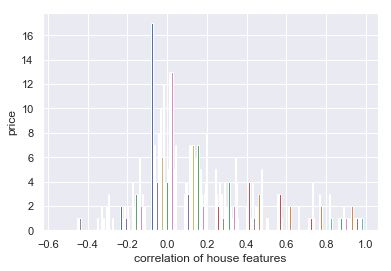

In [17]:
correlation = df.corr()
sns.set()
_ = plt.hist(correlation)
_ = plt.xlabel('correlation of house features')
_ = plt.ylabel('price')
plt.show()

### the correlation histogram above allows us to see how the top 5 features are so much more correlated than the rest of the features

(array([1.0000e+00, 3.0000e+00, 2.9000e+01, 2.4200e+02, 2.0380e+03,
        1.5049e+04, 2.6150e+03, 1.1340e+03, 3.9900e+02, 1.0300e+02]),
 array([ 1. ,  2.2,  3.4,  4.6,  5.8,  7. ,  8.2,  9.4, 10.6, 11.8, 13. ]),
 <a list of 10 Patch objects>)

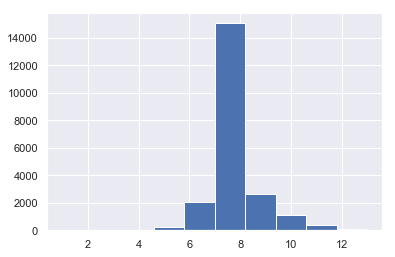

In [18]:
#since grade has a high correlation with price, take a look at how grade data points are distributed on a histogram
plt.hist(df['grade'])

### In our correlation stats, building grade was one of the highest correlation features with price and the building grade histogram above indicates that majority of king county real estate falls around a 7.5 building grade

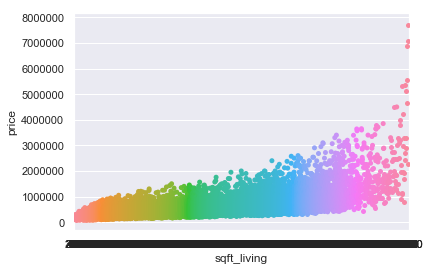

In [19]:
#take a look at beeswarm plot for highest correlated feature of sqft_living
_ = sns.swarmplot(x='sqft_living', y='price', data=df)

### beeswarm plot shows marked correlation between square foot living area and price, which is what we would expect

In [20]:
#utilizing numpy mean, find means of different features
#create variable for no of bathrooms to do further data visualizations
no_of_bathrooms = df[['bathrooms']]
no_of_bedrooms = df[['bedrooms']]
no_of_floors = df[['floors']]
building_grade = df[['grade']]
mean_no_bedrms = np.mean(no_of_bedrooms)
mean_no_bathrms = np.mean(no_of_bathrooms)
mean_no_floors = np.mean(no_of_floors)
mean_building_grade = np.mean(building_grade)
print(mean_no_bedrms)
print(mean_no_bathrms)
print(mean_no_floors)
print(mean_building_grade)

bedrooms    3.370842
dtype: float64
bathrooms    2.114757
dtype: float64
floors    1.494309
dtype: float64
grade    7.656873
dtype: float64


### performing numpy stats shows us that the average number of bedrooms is approx 3, the average number of bathrooms is 2 , the average number of floors is 1.5 and the average building grade is approx 7.5.

{'whiskers': [<matplotlib.lines.Line2D at 0x16e9524cc18>,
 'caps': [<matplotlib.lines.Line2D at 0x16e952da518>,
 'boxes': [<matplotlib.lines.Line2D at 0x16e9524cf28>],
 'medians': [<matplotlib.lines.Line2D at 0x16e952daa20>],
 'fliers': [<matplotlib.lines.Line2D at 0x16e94b19898>],
 'means': [<matplotlib.lines.Line2D at 0x16e94b191d0>]}

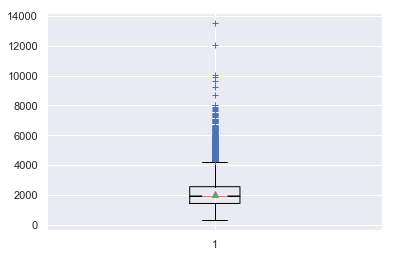

In [21]:
#take a look at how median for square foot living falls on a box and whisker plot.
plt.boxplot(df['sqft_living'],1, showmeans = True, sym = 'b+')

{'whiskers': [<matplotlib.lines.Line2D at 0x16e9527e2e8>,
 'caps': [<matplotlib.lines.Line2D at 0x16e9527edd8>,
 'boxes': [<matplotlib.lines.Line2D at 0x16e9527e908>],
 'medians': [<matplotlib.lines.Line2D at 0x16e94e59710>],
 'fliers': [],
 'means': [<matplotlib.lines.Line2D at 0x16e94e59b38>]}

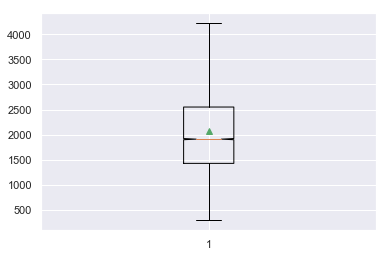

In [22]:
#compare that to the box and whisker plot without the outliers
plt.boxplot(df['sqft_living'],1, showmeans = True, sym = '')

In [23]:
np.mean(df['sqft_living'])

2079.8997362698374

### since the boxplot without outliers looks the same as with outliers, we can conclude that the data is well distributed, the median is similar to the mean and that the median square foot living area is around 2000 square feet

In [24]:
#compute percentiles for the prices of homes
print(np.mean(df['price']))
percentiles = np.array([2.5, 25, 50, 75, 97.5])
prices_homes = df[['price']]
homes_percent = np.percentile(prices_homes,percentiles)
print(homes_percent)

540088.1417665294
[ 185000.  321950.  450000.  645000. 1485000.]


### based on the percentile assessment, the majority of homes fall around the 450,000 dollar price range

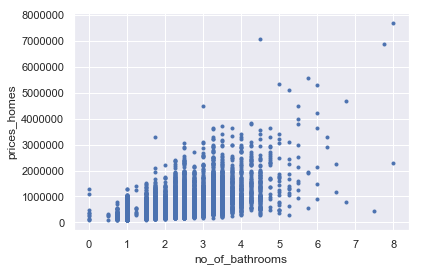

In [25]:
#Since number of bathrooms was even more highly correlated with price than number of bedrooms, take a look at the scatterplot of no of bathrooms vs  the price
_ = plt.plot(no_of_bathrooms, prices_homes, marker = '.', linestyle = 'none')
_ = plt.xlabel('no_of_bathrooms')
_ = plt.ylabel('prices_homes')
plt.show()

### the scatterplot of bathrooms and price shows a definite correlation between price and number of bathroom. However, what's interesting is that after 3.5 bathrooms there are many data points within 4-5 bathrooms that are at the same price of the 3.5 bathrooms so it appears to level off a bit after 3.5 bathrooms

In [26]:
def ecdf(x):
    x = np.sort(x)
    y = np.arange(1,len(x) + 1)/ len(x)
    return x,y


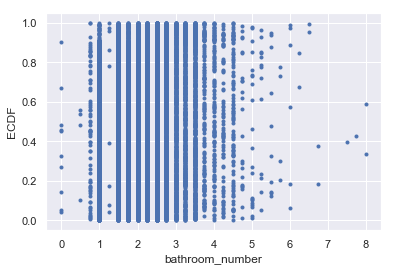

In [27]:
#compute ecdf for number of bathrooms
import statsmodels as sm
import sklearn as sl
import scipy.special
import scipy as sp
from scipy import stats

x_bath, y_bath = ecdf(no_of_bathrooms)
_ = plt.plot(x_bath, y_bath, marker = '.', linestyle = 'none')
_ = plt.xlabel('bathroom_number')
_ = plt.ylabel('ECDF')
plt.show()

### the cumulative distribution function shows most probability of number of bathrooms falling between 1.5 and 3.5 which makes sense since the average number of bathrooms in our data is 2 

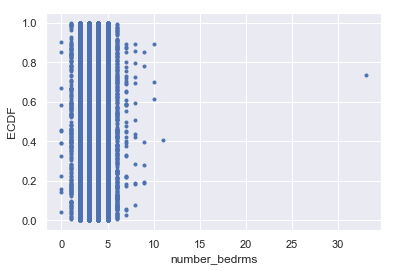

In [28]:
#create more variables to plot more ECDF visualizations(no of bedrooms, no of floors)
x_bed, y_bed = ecdf(no_of_bedrooms)
_ = plt.plot(x_bed, y_bed, marker = '.', linestyle = 'none')
_ = plt.xlabel('number_bedrms')
_ = plt.ylabel('ECDF')
plt.show()

### In this ecdf visualization for the number of bedrooms, the highest probability is between 2 and 5 which also corresponds to our average number of bedrooms of 3.5

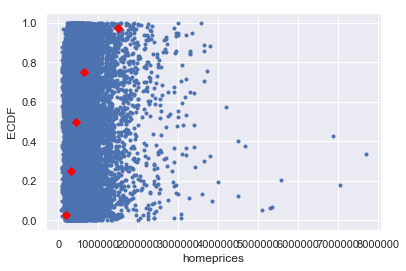

In [29]:
#plot the percentiles of home prices on the ECDF plot 
x_pr, y_pr = ecdf(prices_homes)
_ = plt.plot(x_pr, y_pr, '.')
_ = plt.xlabel('homeprices')
_ = plt.ylabel('ECDF')
_ = plt.plot(homes_percent, percentiles/100, marker='D', color='red', linestyle='none')
plt.show()

### plotting the home price percentiles with the ecdf shows us the highest probability of homes falls within 500,000 which also matches our average house price of 540,088 dollars.  The ecdf visualizations also confirm that our data falls within a  normal distribution and thus we can next do statistical hypothesis testing 

## Frequentist/Bootstrap Hypothesis Testing:
### null hypoth: diff of means between full data sample and bootstrap random data sample = 0
### alt hypoth: diff of means between full data sample and bootstrap random data sample != 0

In [45]:
#In the previous visualizations we determined our data was normally distributed(eg.take a look at histogram for building grade)
#since our sample size > 30, we can also determine the observations are independent
#therefore begin with bootstrap testing to compare our previous numpy mean(7.66) of building grade with bootstrap testing mean
bs_sample = np.random.choice(df['grade'], size = 100)
bs_mean = np.mean(bs_sample)
bs_std = np.std(bs_sample)
bs_zse = bs_std / (100)**.5
bs_zsre = (bs_mean -7.66) / bs_zse
print(bs_mean,bs_std,bs_zse)
print("z_score is: ", bs_zsre)

7.85 1.2031209415515967 0.12031209415515967
z_score is:  1.5792261063544226


### z score above corresponds to p value of .114 which is greater than .05, therefore we fail to reject the hypothesis and  conclude that there is no statistical difference between the difference of the means even when a random bootstrap sample set is chosen

### In our data exploration and visualization, we determined the mean home price was 540,088 dollars, the mean no of bathrooms was 2  and the mean no of bedrooms was 3.  We will take a look at the mean house price having mean no of bathrooms(2) against mean home price having mean number of bedrooms(3)

### Null hypoth: The difference of means of home price with 3 bedrooms and 2 bathrooms = 0
### Alt hypoth: The difference of means of home price with 3 bedrooms and 2 bathrooms != 0

In [31]:
#create a for loop to only look at home prices with 3 bedrooms
booleans = []
for size in df.bedrooms:
    if size == 3:
        booleans.append(True)
    else:
        booleans.append(False)

In [32]:
#take a look at boolean series
print(booleans[0:5])
is_ave = pd.Series(booleans)
three_rms = df[is_ave]
print(len(three_rms))
three_rms_price = three_rms['price']

[True, True, False, False, True]
9824


In [33]:
#evaluate mean of home prices with 3 bedrooms
np.mean(three_rms_price)

466232.07848127035

In [34]:
#create boolean series for home prices that have 2 bathrooms
is_ave_bath = df.bathrooms == 2
is_ave_bath.head()

0    False
1    False
2    False
3    False
4     True
Name: bathrooms, dtype: bool

In [35]:
#calculate mean of home prices with 2 bathrooms
two_bath = df[is_ave_bath]
two_bath_price = two_bath['price']
print(len(two_bath))
np.mean(two_bath_price)

1930


457889.7186528497

In [36]:
all_home_prices = df['price']
all_sorted_prices = np.sort(all_home_prices)
len(all_sorted_prices)

21613

In [37]:
21613/2 

10806.5

In [38]:
all_sorted_prices[10806]

450000.0

### These findings suggest the mean number of 3 bedrooms, associated with a mean home price of 466232 dollars, is closer to the mean home price of 540088.  This may be due, however, to the fact that there is a larger sample size(9824) of 3 bedrooms compared to the sample size of 1930 for two bathrooms.  This may also be due to the fact that the mean home price of 540088 is being affected by the higher end house prices(such as a home priced at 7 million). If we look at median home price instead which is 450,000 which we got from boxplot visualization and statistical calculations, the mean price of two bathroom homes more closely aligns with 450,000.  This makes sense since correlation testing indicated bathroom number was more highly correlated with home prices than bedrooms were.

In [39]:
diff_of_means = 466232.08 - 457889.7
diff_of_means


8342.380000000005

In [40]:
#import stats package to determine p value and to recheck z score above.
from statsmodels.stats.weightstats import ztest
z, pval = ztest(three_rms_price,two_bath_price, alternative='two-sided')
print('z: {} , pval: {}'.format(z, pval))

z: 1.3187908819369583 , pval: 0.1872390333994377


### Based on a 95% confidence interval,a p-value of .18 indicates that we cannot conclude that significant difference exists between the mean home price of two bathrooms and the mean home price of three bathrooms.
### This is interesting since it helps us in our house prediction analysis.  Last we will compare the mean home price using bootstrapping method against the actual mean home price.  This will help us take a look at the mean home price given a random sample and also evaluate the validity of our data set.  

In [56]:
print(np.mean(df['price']))
home_std = (np.std(df['price']))
print(home_std)
bs_sample = np.random.choice(df['price'], size = 2000)
bs_mean = np.mean(bs_sample)
bs_std = np.std(bs_sample)
bs_zse = bs_std / (2000)**.5
bs_zsre = (bs_mean - 540088) / bs_zse
print(bs_mean,bs_std,bs_zse)
print("z_score is: ", bs_zsre)

540088.1417665294
367118.7031813722
538671.687 360520.7831997471 8061.489785360986
z_score is:  -0.17568874211958632


### Based on the p-value of >.05(>.05 value when repeated 10 times), we can fail to reject the hypothesis that there is a statistical difference between the the mean of our bootstrap sample and the mean of our housing price data set.  

In [54]:
twosamp_std = ((((bs_std)**2)/2000) + (((home_std)**2)/21613))**.5
m_of_err = 1.96 * (twosamp_std)
m_of_err

17007.461721128653

In [55]:
conf_int = (diff_of_means + m_of_err), (diff_of_means - m_of_err)
print(conf_int)

(25349.841721128658, -8665.081721128648)


### Within a margin of error of 17,007 dollars, we can be 95% certain that the confidence interval range above contains our true mean.  The high standard deviation however in both the bootstrap data set as well as the actual dataset is an indication that there is a large range and high degree of variability of some data points from the mean.  This might be due to the few houses that are on the higher end of the dataset.  This is an important finding from our hypothesis and statistical testing as it indicates that, as the dataset stands, the median is a more reliable measurement of central tendency.  It also indicates, that these outliers or higher priced homes should be removed from the dataset before beginning regression model testing.